# US Accidents Exploratory Data Analysis


### TODO

- Talk about Exploratory Data Analysis
- Talk about the dataset (source, what it contains, how it will be usefull)


## Data Download

---


### Method 1: Kaggle's API

It will require the **Kaggle username** & **Kaggle Key** which will be in the `kaggle.json` file that is downloadable from the Kaggle Account.


In [29]:
# !pip install opendatasets --upgrade --quiet


In [30]:
# import opendatasets as od

# download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents?resource=download'

# od.download(download_url)


### Method 2: Manual Download

I did this step here where I manually downloaded the file to the `./data` path.


In [31]:
dataset_file = './data/US_Accidents_Dec21_updated.csv'


## Data Preperation and Cleaning

---


### Loading the files using Pandas


In [32]:
import pandas as pd

df = pd.read_csv(dataset_file)


### Look at the information about the file


In [33]:
df.head()


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Method 1:


In [34]:
# entries and columns
print('The DataFrame contains {:,} rows and the number of columns is {}. \n\n Here is a list of all the Columns:\n {}'.format(
    len(df), len(df.columns), df.columns))

# for converting the columns in the DataFrame list
# pd.DataFrame(df.columns)


The DataFrame contains 2,845,342 rows and the number of columns is 47. 

 Here is a list of all the Columns:
 Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


#### Method 2:


In [35]:
# this is the full info of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Method 2 is way much better because it provides a full list without creating a Dataframe to store the Columns and it also shows the datatypes of the columns.


In [36]:
# a summary of the numerical values
df.describe()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [37]:
# getting the columns with numeric datatypes
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

print('We have {} numeric columns'.format(len(numeric_df.columns)))


We have 14 numeric columns


### Fix any missing or incorrect values


In [46]:
# percentage of missing values per column
missing_percentages = (df.isna().sum().sort_values(
    ascending=False) / len(df))*100
missing_percentages


Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<Axes: >

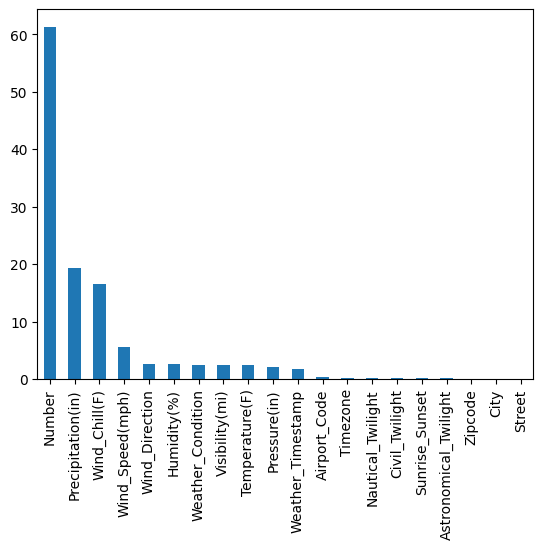

In [62]:
# filtering missing percentages that are not equal to zero and plotting 
missing_percentages[missing_percentages !=0].plot(kind='bar')

## Exploratory Analysis and Visualization
---

Columns to analyse.
1. City
2. Start Time
3. Start Latitude, Start Longitude
4. Temperature
5. Weather condition

### City

In [71]:
# checking for unique cities
cities = df['City'].unique()
print('There are {:,} unique Cities in this Dataset'.format(len(cities)))

# first 100 cities
cities[:100]

There are 11,682 unique Cities in this Dataset


array(['Dublin', 'Dayton', 'Cincinnati', 'Akron', 'Williamsburg',
       'Cleveland', 'Lima', 'Westerville', 'Jamestown', 'Freeport',
       'Columbus', 'Toledo', 'Roanoke', 'Ft Mitchell', 'Edinburgh',
       'Fairborn', 'Shelbyville', 'Greensburg', 'Saint Paul',
       'Parkersburg', 'Indianapolis', 'Dundee', 'Jeffersonville',
       'Pittsburgh', 'Lewis Center', 'Dunkirk', 'Redkey', 'Milton',
       'Willshire', 'Straughn', 'Cambridge Springs', 'Fremont',
       'Louisville', 'South Charleston', 'Edinboro', 'Buckhannon',
       'Lockbourne', 'Painesville', 'Washington', 'Dunbar', 'Angola',
       'Edon', 'Medina', 'De Mossville', 'New Albany', 'Charleston',
       'Fort Wayne', 'Burnsville', 'Bedford', 'Clarksville', 'Lakewood',
       'Richfield', 'Sewickley', 'Independence', 'Westlake', 'Erlanger',
       'Grove City', 'Monroe', 'West Middlesex', 'Gaston', 'Economy',
       'Fairmount', 'Hagerstown', 'Walton', 'Crittenden', 'Coraopolis',
       'Holland', 'Greenfield', 'Anderson', 

In [73]:
cities_by_accident = df['City'].value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

# Questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states has the highest number of accidents? How about per capita?
